In [25]:
## Main Library

# Reading Data and Visualozation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures

# Model Algorithmes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# read Data
data = pd.read_csv("D:\Courses language programming\Machine Learning\Folder Machine Learning\Mall_Customers.csv")
data.head()

# Y_target ==> Spending Score (1-100)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int32
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


In [94]:
data.scatter()

AttributeError: 'DataFrame' object has no attribute 'scatter'

In [4]:
# claening Data 

data.drop(columns="CustomerID", inplace=True, axis=1)


# preprocessing Data

la = LabelEncoder()
data["Genre"] = la.fit_transform(data["Genre"])
data.head(10)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
5,0,22,17,76
6,0,35,18,6
7,0,23,18,94
8,1,64,19,3
9,0,30,19,72


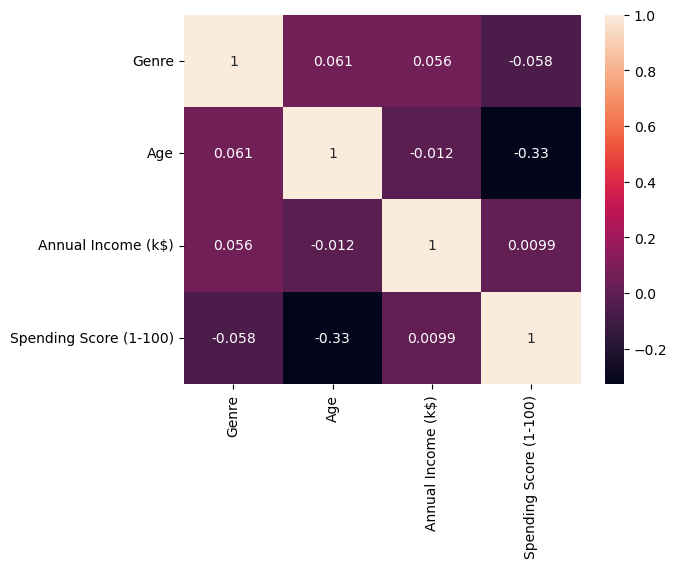

In [5]:
sns.heatmap(data.corr(), annot=True);

In [88]:
# split_data == > Input & Output

X_input = data.drop(columns="Spending Score (1-100)", axis=1)
Y_target = data["Spending Score (1-100)"]

poly = PolynomialFeatures(degree=6)
new_x = poly.fit_transform(X_input)

In [89]:
model1 = RandomForestRegressor(max_depth=18, n_estimators=19)

model1.fit(new_x, Y_target)

print(f"The Predict value Of train ==>  {model1.score(new_x, Y_target)}")
print("-"*20)
print(f"The Predict value Of train ==>  {model1.score(new_x, Y_target)}")

The Predict value Of train ==>  0.8424616847626523
--------------------
The Predict value Of train ==>  0.8424616847626523


In [90]:
# model2 = RandomForestRegressor()

# model2.fit(x_train, y_train)


# print(f"The Predict value Of train ==>  {model2.score(x_train, y_train)} ")
# print("-"*20)
# print(f"The Predict value Of train ==>  {model2.score(x_test,  y_test)} ")

In [91]:
param_grid_RF = {"n_estimators": np.arange(15, 25, 1), 
                 "max_depth": np.arange(12, 20, 2)}

new_model_RF = GridSearchCV(estimator=model1, 
                            param_grid=param_grid_RF, 
                            cv=5,
                            n_jobs=-1,
                            scoring="neg_mean_squared_error",
                            verbose=6)

new_model_RF.fit(new_x, Y_target)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=18, n_estimators=19),
             n_jobs=-1,
             param_grid={'max_depth': array([12, 14, 16, 18]),
                         'n_estimators': array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24])},
             scoring='neg_mean_squared_error', verbose=6)

In [92]:
new_model_RF.best_estimator_

RandomForestRegressor(max_depth=18, n_estimators=17)